
WHOLESALE CUSTOMER ANALYSIS



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
import os
os.chdir('C:\\Users\\WELCOME\\Downloads\\PYTHON FILES\\SMDM\\project')

In [3]:
df= pd.read_csv('Wholesale Customer.csv')
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

1.Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [8]:
df.groupby(['Region', 'Channel']).size()

Region  Channel
Lisbon  Hotel       59
        Retail      18
Oporto  Hotel       28
        Retail      19
Other   Hotel      211
        Retail     105
dtype: int64

In [9]:
dfnew = df.drop(['Buyer/Spender'], axis= 1)
dfnew.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [10]:
dfnew['Total'] = dfnew[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum(axis=1)
dfnew.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [11]:
results1 = dfnew.groupby(['Region','Channel']).sum().reset_index()
results1


,Region,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,Hotel,761233,228342,237542,184512,56081,70632,1538342
1,Lisbon,Retail,93600,194112,332495,46514,148055,33695,848471
2,Oporto,Hotel,326215,64519,123074,160861,13516,30965,719150
3,Oporto,Retail,138506,174625,310200,29271,159795,23541,835938
4,Other,Hotel,2928269,735753,820101,771606,165990,320358,5742077
5,Other,Retail,1032308,1153006,1675150,158886,724420,191752,4935522


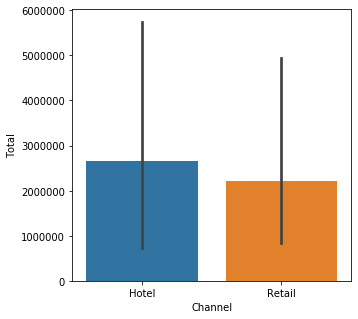

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


In [12]:

plt.figure(figsize=(5,5))
sns.barplot(x=results1['Channel'], y=results1['Total'], data =results1);
plt.show()
dfnew.groupby('Channel',).sum().reset_index()

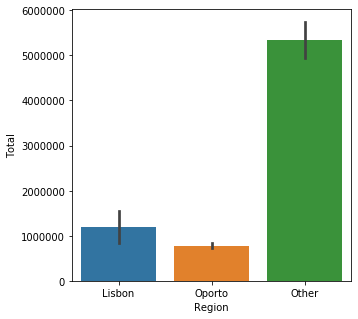

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,464721,239144,433274,190132,173311,54506,1555088
2,Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x=results1['Region'], y=results1['Total'], data =results1);
plt.show()
dfnew.groupby('Region',).sum().reset_index()

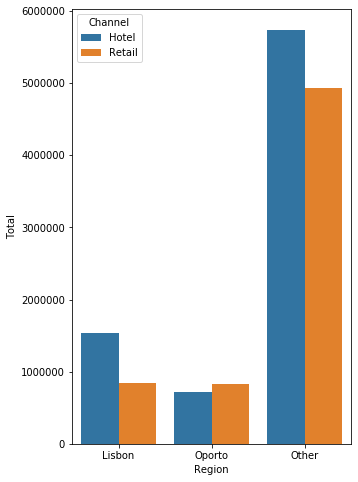

In [14]:
plt.figure(figsize=(5,8))
sns.barplot(x=results1['Region'], y=results1['Total'], hue='Channel', data =results1);
plt.show()

1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

In [15]:
results = dfnew.groupby('Region').sum()
resultsnew= results.drop(columns='Total')
resultsnew

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


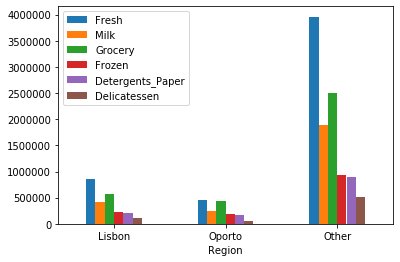

In [16]:
resultsnew.plot.bar(rot=0);

In [17]:
results = dfnew.groupby('Channel').sum()
results2 =results.drop(columns='Total')
results2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


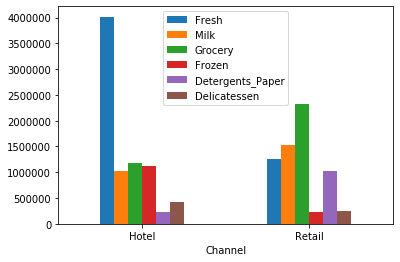

In [18]:
results2.plot.bar(rot=0);

1.3 based on a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

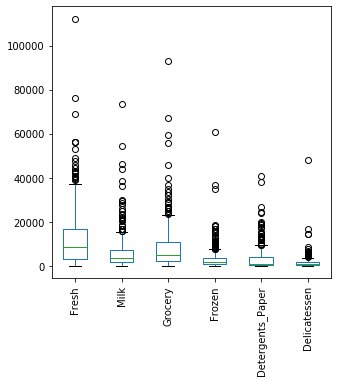

In [27]:
plt.figure (figsize=(5,5))
dfnewout.boxplot(fontsize=None,
    rot=90,
    grid=False);
plt.show()

In [23]:
Q1 =dfnewout.quantile(0.25)
Q3 = dfnewout.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
dtype: float64


In [26]:
dfnewout.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

1.4 Are there any outliers in the data?

In [21]:
dfnewout = df.drop(['Buyer/Spender'], axis= 1)
dfnewout.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


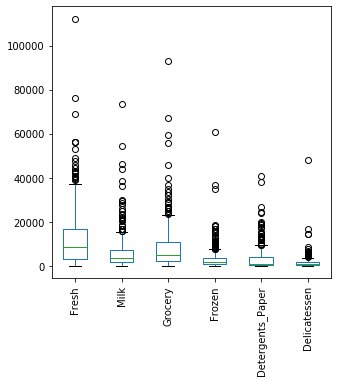

In [25]:
plt.figure (figsize=(5,5))
dfnewout.boxplot(fontsize=None,
    rot=90,
    grid=False);
plt.show()


In [24]:
dfo = (dfnewout < (Q1 - 1.5 * IQR)) |(dfnewout > (Q3 + 1.5 * IQR))
dfo.head()

,Channel,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False
